## AutoResponder.ai
---
`GenAI App - Streamlining Interactions: An Exploration of Robotic Auto Pilot Response Systems`

`AutoResponder.ai:` A Smart AI for Answering Questions from internal knowledgebase: Harnessing the Power of RAG LLMs, SQL /customer databases and Documents.

The objective is to develop an AI capable of answering questions by harnessing information from Issue logs, interal websites, tutorials, ServiceNow, customer support resources, transactional databases using GenAI LLM Tools and Function calling..

**Author:** Amit Shukla

**Connect**

[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/youtube.svg" width=40 height=50>](https://youtube.com/@Amit.Shukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/github.svg" width=40 height=50>](https://github.com/AmitXShukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/medium.svg" width=40 height=50>](https://medium.com/@Amit-Shukla)
[<img src="https://github.com/AmitXShukla/AmitXShukla.github.io/blob/master/assets/icons/twitter_1.svg" width=40 height=50>](https://twitter.com/ashuklax)

---
In this blog, we will build an automated Autoresponder system that

1. Auto downloads messages, chats, enquiries and ticket from sources.
2. The system will read each query content and evaluate them for relevance.
3. The system will utilize a vector database to search for relevant job-aids, user manuals, and service now/help desk information.
4. The system will format the response using a language model and provide it to the user.
5. The system will ensure that only authentic queries receive responses, with spam filtered out by the moderator.

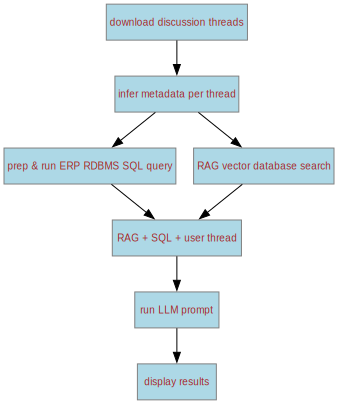

In [1]:
import graphviz

dot = graphviz.Digraph()

dot.attr('node', shape='box', style="filled", fillcolor="lightblue", color="grey", fontcolor="brown", fontname = "Helvetica,Arial,sans-serif", fontsize = "10")
dot.node('A', 'download discussion threads')
dot.node('B', 'infer metadata per thread')
dot.node('C1', 'prep & run ERP RDBMS SQL query')
dot.node('C2', 'RAG vector database search')
dot.node('D', 'RAG + SQL + user thread')
dot.node('E', 'run LLM prompt')
dot.node('F', 'display results')

dot.edge('B', 'C1', dir='forward')
dot.edge('B', 'C2', dir='forward')
dot.edge('C1', 'D', dir='forward')
dot.edge('C2', 'D', dir='forward')
dot.edges(['AB', 'DE', 'EF'])

dot

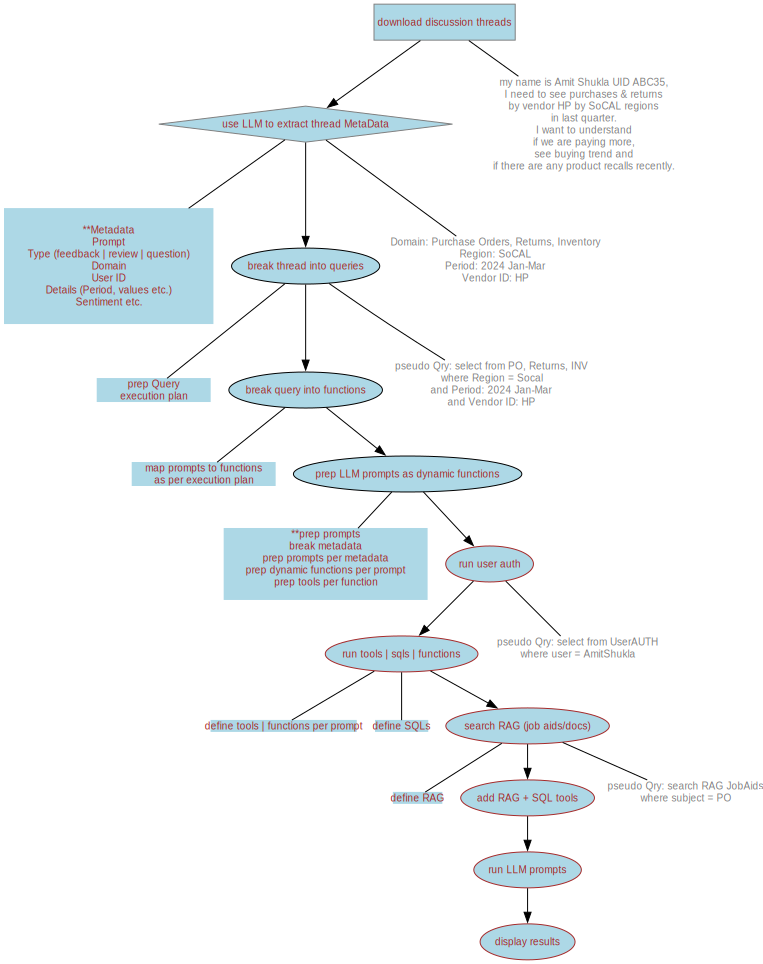

In [14]:
import graphviz

dot = graphviz.Digraph()
dot.attr('node', shape='box', style="filled", fillcolor="lightblue", color="grey", fontcolor="brown", fontname = "Helvetica,Arial,sans-serif", fontsize = "10")
dot.node('A', 'download discussion threads')
# dot.attr('node', shape='box', color="red", fontname = "Helvetica,Arial,sans-serif", fontsize = "10")
dot.attr('node', shape='diamond', color="grey")
dot.node('B', 'use LLM to extract thread MetaData')
dot.attr('node', shape='plaintext', color="grey")
dot.node('B1', """
               **Metadata
               Prompt
               Type (feedback | review | question)
               Domain
               User ID
               Details (Period, values etc.)
               Sentiment etc.
             """)
dot.attr('node', shape='ellipse', color="black")
dot.node('C', 'break thread into queries')
dot.attr('node', shape='plain', color="grey")
dot.node('C1', """prep Query
                 execution plan""")
dot.attr('node', shape='ellipse', color="black")
dot.node('D', 'break query into functions')
dot.attr('node', shape='plain', color="grey")
dot.node('D1', """map prompts to functions
                 as per execution plan""")
dot.attr('node', shape='ellipse', color="black")
dot.node('E', 'prep LLM prompts as dynamic functions')
dot.attr('node', shape='plain', color="grey")
dot.node('E1', """**prep prompts
                  break metadata
                  prep prompts per metadata
                  prep dynamic functions per prompt
                  prep tools per function
               """)
dot.node('J1', 'define tools | functions per prompt')
dot.node('J2', 'define SQLs')
dot.node('K1', 'define RAG')
dot.attr('node', shape='ellipse', color="brown")
dot.node('I', 'run user auth')
dot.node('J', 'run tools | sqls | functions')
dot.node('K', 'search RAG (job aids/docs)')
dot.node('L', 'add RAG + SQL tools')
dot.node('M', 'run LLM prompts')
dot.node('N', 'display results')
dot.attr('node', shape='plain', style="", fontcolor="grey", fontsize="10")
dot.node('A21', """my name is Amit Shukla UID ABC35, 
                  I need to see purchases & returns
                  by vendor HP by SoCAL regions
                  in last quarter.
                  I want to understand
                  if we are paying more, 
                  see buying trend and
                  if there are any product recalls recently.""")
dot.node('B21', """Domain: Purchase Orders, Returns, Inventory
                  Region: SoCAL
                  Period: 2024 Jan-Mar
                  Vendor ID: HP
                  """)
dot.node('C21', """pseudo Qry: select from PO, Returns, INV
                  where Region = Socal
                    and Period: 2024 Jan-Mar
                    and Vendor ID: HP
                  """)
dot.node('I21', """pseudo Qry: select from UserAUTH
                  where user = AmitShukla
                  """)
dot.node('K21', """pseudo Qry: search RAG JobAids
                  where subject = PO
                  """)

# dot.edge('A', 'B', dir='forward')
dot.edge('B', 'B1', dir='none')
dot.edge('C', 'C1', dir='none')
dot.edge('D', 'D1', dir='none')
dot.edge('E', 'E1', dir='none')
dot.edge('J', 'J1', dir='none')
dot.edge('J', 'J2', dir='none')
dot.edge('K', 'K1', dir='none')
dot.edge('A', 'A21', dir='none')
dot.edge('B', 'B21', dir='none')
dot.edge('C', 'C21', dir='none')
dot.edge('I', 'I21', dir='none')
dot.edge('K', 'K21', dir='none')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EI', 'IJ', 'JK', 'KL', 'LM', 'MN'])

dot

In [ ]:
data =""
prompt = ""
import ollama
output = ollama.generate(
  model="llama3.1",
  prompt=f"""rephrase this sentence: which region is ordering the most expensive items?"""
# # """
)

print(output["response"])  # type: ignore